In [249]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [250]:
import math
import numpy as np

In [374]:
gravity = 32.2  # ft/s^2
initial_position = math.pi/4
initial_velocity = 0
arm_length = 2 # feet
end_time = 4  # seconds
time_step = 0.05  # seconds
time_range = np.arange(0,end_time,time_step)

\begin{equation*}
\theta(t) = A\sin(\lambda t) + B\cos(\lambda t)
\end{equation*}

In [364]:
def pendulum_analytical_angle_sol(velocity_naut, theta_naut, length, end_time):
    lambd = math.sqrt(gravity/length)
    A = velocity_naut / lambd
    B = theta_naut
    angle_in_time = []
    for time in time_range:
        angle_in_time.append((A * math.sin(lambd * time)) + (B * math.cos(lambd * time)))
    return angle_in_time

In [365]:
analytical_solution_output = pendulum_analytical_angle_sol(initial_velocity,initial_position,arm_length,end_time)

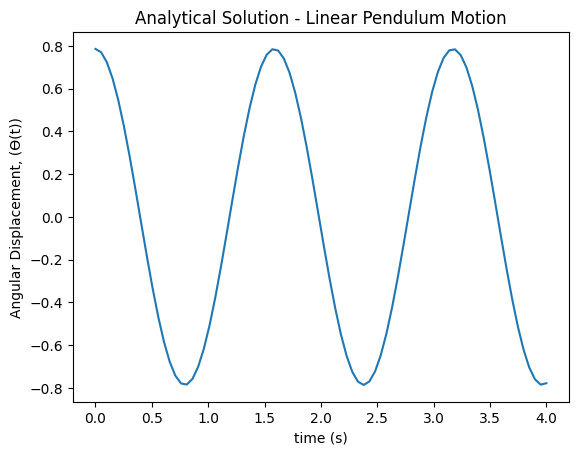

In [366]:
plt.xlabel('time (s)')
plt.ylabel('Angular Displacement, (ϴ(t))')
plt.title('Analytical Solution - Linear Pendulum Motion')
plot_time = np.linspace(0, end_time, len(analytical_solution_output))
plt.plot(plot_time,analytical_solution_output)

\begin{equation*}
v_{i+1} = v_i - \Delta t \lambda^2 \theta_i \\
\theta_{i+1} = \theta_i + \Delta t v_i
\end{equation*}

In [368]:
def pendulum_numerical_angle_sol_foward_difference(velocity_naut, theta_naut, length, end_time, time_step):
    lambd = math.sqrt(gravity/length)
    velocity_series = [velocity_naut]
    angle_series = [theta_naut]
    
    for i in range(len(time_range)-1):
        velocity_series.append(velocity_series[i] - (time_step * lambd**2 * angle_series[i]))
        angle_series.append(angle_series[i] + (time_step * velocity_series[i]))
        
    return angle_series

\begin{equation*}
v_{i+1} = v_{i-1} - \Delta t \lambda^2 \theta_{i-1} \\
\theta_{i+1} = \theta_{i-1} + \Delta t v_i
\end{equation*}

In [369]:
def pendulum_numerical_angle_sol_backward_difference(velocity_naut, theta_naut, length, end_time, time_step):
    lambd = math.sqrt(gravity/length)
    velocity_series = [velocity_naut]
    angle_series = [theta_naut]
    
    for i in range(1, len(time_range)):
        velocity_series.append(velocity_series[i-1] - (time_step * lambd**2 * angle_series[i-1]))
        angle_series.append(angle_series[i-1] + (time_step * velocity_series[i]))
        
    return angle_series

\begin{equation*}
v_{i+1} = v_{i-1} - 2 \Delta t \lambda^2 \theta_{i-1} \\
\theta_{i+1} = \frac{\theta_{i-1} + \Delta t v_{i-1} + v_i}{2}
\end{equation*}

In [370]:
def pendulum_numerical_angle_sol_central_difference(velocity_naut, theta_naut, length, end_time, time_step):
    lambd = math.sqrt(gravity/length)
    velocity_series = [velocity_naut]
    angle_series = [theta_naut]
    
    for i in range(1, len(time_range)):
        velocity_series.append(velocity_series[i-1] - (2 * time_step * lambd**2 * angle_series[i-1]))
        angle_series.append((angle_series[i-1] + (time_step * (velocity_series[i-1] + velocity_series[i])) / 2))
        
    return angle_series

In [371]:
numerical_solution_output_forward_difference = pendulum_numerical_angle_sol_foward_difference(initial_velocity,initial_position,arm_length,end_time,time_step)

In [372]:
numerical_solution_output_backward_difference = pendulum_numerical_angle_sol_backward_difference(initial_velocity,initial_position,arm_length,end_time,time_step)

In [373]:
numerical_solution_output_central_difference = pendulum_numerical_angle_sol_central_difference(initial_velocity,initial_position,arm_length,end_time,time_step)

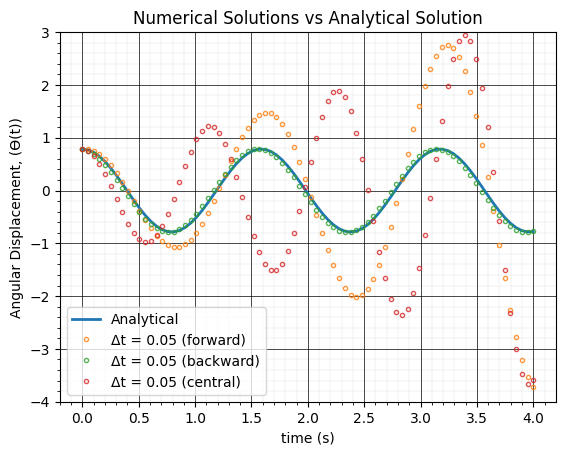

In [375]:
plt.xlabel('time (s)')
plt.ylabel('Angular Displacement, (ϴ(t))')
plt.title('Numerical Solutions vs Analytical Solution')
plt.grid(color = 'black', which = 'major', linestyle = '-', linewidth = 0.5)
plt.grid(color = 'black', which = 'minor', linestyle = '--', linewidth = 0.05)
plt.minorticks_on()
plt.ylim([-4, 3])

plot_time = np.linspace(0, end_time, len(analytical_solution_output))
plt.plot(plot_time,analytical_solution_output, label='Analytical', linewidth=2)
plt.plot(plot_time,numerical_solution_output_forward_difference,"o" , label=f'Δt = {time_step} (forward)', markersize=3, alpha = 0.8, mfc='none')
plt.plot(plot_time,numerical_solution_output_backward_difference,"o" , label=f'Δt = {time_step} (backward)', markersize=3, alpha = 0.8, mfc='none')
plt.plot(plot_time,numerical_solution_output_central_difference,"o" , label=f'Δt = {time_step} (central)', markersize=3, alpha = 0.8, mfc='none')

plt.legend(loc="lower left")

In [376]:
forward_error_plot = []
def calculate_error_forward(numerical_solution, analytical_solution):
    for i in range(len(time_range)):
        forward_error_plot.append(abs(numerical_solution[i] - analytical_solution[i])) 
        print( f'error at time {i*time_step:.2f} = {abs(numerical_solution[i] - analytical_solution[i])}')

In [377]:
backward_error_plot = []
def calculate_error_backward(numerical_solution, analytical_solution):
    for i in range(len(time_range)):
        backward_error_plot.append(abs(numerical_solution[i] - analytical_solution[i])) 
        print( f'error at time {i*time_step:.2f} = {abs(numerical_solution[i] - analytical_solution[i])}')

In [378]:
central_error_plot = []
def calculate_error_central(numerical_solution, analytical_solution):
    for i in range(len(time_range)):
        central_error_plot.append(abs(numerical_solution[i] - analytical_solution[i])) 
        print( f'error at time {i*time_step:.2f} = {abs(numerical_solution[i] - analytical_solution[i])}')

In [339]:
calculate_error_forward(numerical_solution_output_forward_difference,analytical_solution_output)

error at time 0.00 = 0.0
error at time 0.05 = 0.015753192696299823
error at time 0.10 = 0.030768552614130584
error at time 0.15 = 0.04317560393873343
error at time 0.20 = 0.05121276571312727
error at time 0.25 = 0.053349060281358385
error at time 0.30 = 0.048396399490262976
error at time 0.35 = 0.03560588981590368
error at time 0.40 = 0.01474224556935479
error at time 0.45 = 0.013868632868641817
error at time 0.50 = 0.04932261033461188
error at time 0.55 = 0.09015301672624332
error at time 0.60 = 0.13437967802237116
error at time 0.65 = 0.17959013952137604
error at time 0.70 = 0.2230502176530479
error at time 0.75 = 0.2618393735831187
error at time 0.80 = 0.2930049235998783
error at time 0.85 = 0.3137278660292738
error at time 0.90 = 0.3214921811412097
error at time 0.95 = 0.31424890552711726
error at time 1.00 = 0.29056613641615847
error at time 1.05 = 0.2497564069424522
error at time 1.10 = 0.1919735933380795
error at time 1.15 = 0.11827265174979035
error at time 1.20 = 0.03062699782

In [340]:
calculate_error_backward(numerical_solution_output_backward_difference,analytical_solution_output)

error at time 0.00 = 0.0
error at time 0.05 = 0.015859083380447503
error at time 0.10 = 0.03118360542727494
error at time 0.15 = 0.045350467594074684
error at time 0.20 = 0.05777925670770967
error at time 0.25 = 0.06795601565181308
error at time 0.30 = 0.07545447965262289
error at time 0.35 = 0.07995390136287966
error at time 0.40 = 0.08125272049015995
error at time 0.45 = 0.07927749729772282
error at time 0.50 = 0.07408671748196821
error at time 0.55 = 0.06586928122529534
error at time 0.60 = 0.05493770341879067
error at time 0.65 = 0.041716266515042455
error at time 0.70 = 0.026724573511409666
error at time 0.75 = 0.010557137769489744
error at time 0.80 = 0.006140189031088039
error at time 0.85 = 0.022696016355472692
error at time 0.90 = 0.038440411129906704
error at time 0.95 = 0.05273200539904499
error at time 1.00 = 0.06498411851058
error at time 1.05 = 0.07468883008888416
error at time 1.10 = 0.0814380164445162
error at time 1.15 = 0.08494047993127851
error at time 1.20 = 0.08503

In [341]:
calculate_error_central(numerical_solution_output_central_difference,analytical_solution_output)

error at time 0.00 = 0.0
error at time 0.05 = 0.015859083380447503
error at time 0.10 = 0.06279588150402227
error at time 0.15 = 0.1376425076001384
error at time 0.20 = 0.23361021952424837
error at time 0.25 = 0.3407658697765015
error at time 0.30 = 0.44682762856836233
error at time 0.35 = 0.5382238541618972
error at time 0.40 = 0.6013338554255341
error at time 0.45 = 0.6238099569155768
error at time 0.50 = 0.5958685835127482
error at time 0.55 = 0.5114353227054617
error at time 0.60 = 0.3690357091415368
error at time 0.65 = 0.17233965950931296
error at time 0.70 = 0.06970786124632733
error at time 0.75 = 0.3432059017447929
error at time 0.80 = 0.6300663003231761
error at time 0.85 = 0.9091944382881658
error at time 0.90 = 1.1580077863516052
error at time 0.95 = 1.3541859466009685
error at time 1.00 = 1.477520948768023
error at time 1.05 = 1.511721164096396
error at time 1.10 = 1.4460180583550204
error at time 1.15 = 1.276432983036126
error at time 1.20 = 1.006581219340255
error at tim

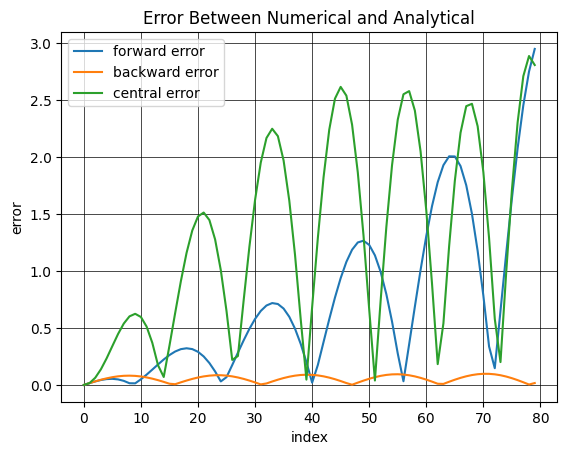

In [344]:
# plot errors
plt.plot(forward_error_plot,"-" , label='forward error', markersize=3)
plt.plot(backward_error_plot,"-" , label='backward error', markersize=3)
plt.plot(central_error_plot,"-" , label='central error', markersize=3)
plt.xlabel('index')
plt.ylabel('error')
plt.title('Error Between Numerical and Analytical')
plt.grid(color = 'black', which = 'major', linestyle = '-', linewidth = 0.5)
plt.grid(color = 'black', which = 'minor', linestyle = '--', linewidth = 0.05)
plt.legend(loc="upper left")
